## Regression 

This notebook shows the implementation of linear regression model and deriving mean absolute error for the data set **Advertising** taken from http://www-bcf.usc.edu/~gareth/ISL/data.html

Libraries used are

- pandas: for data analysis and handling
- numpy: for numerical computation
- matplotlib: for plotting data
- sklearn: for regression, classification models


#### Data Description

There are 3 features *TV*, *Newspaper*, *Radio* and one response variable *Sales* having 200 data points. 

Model is:
$y=\beta_0 +\beta_1 x_1 +\beta_2 x_2 + \beta_3 x_3 $


In [153]:
import pandas as pd
import numpy as np

In [154]:
data=pd.read_csv('Advertising.csv',index_col=0)
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [155]:
data.shape

(200, 4)

In [156]:
feature_col=['TV','Radio','Newspaper']
X=data[feature_col]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [157]:
X.shape

(200, 3)

In [158]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [159]:
y.shape

(200,)

In [160]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [161]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150,)
(50,)


In [162]:
y_test

190     6.7
154    19.0
72     12.4
147    13.2
42     17.1
92      7.3
98     15.5
37     25.4
71     18.3
186    22.6
26     12.0
114    15.9
189    15.9
28     15.9
197     9.7
149    10.9
135    10.8
130     9.7
144    10.4
31     21.4
110    19.8
85     21.7
64     14.0
174    11.7
12     17.4
48     23.2
68     13.4
160    12.9
94     22.2
47     10.6
45      8.5
89     12.9
57      5.5
80     11.0
118     9.4
157    15.3
148    25.4
172    14.5
184    26.2
119    15.9
5      12.9
194    19.6
151    16.1
40     21.5
152    11.6
33      9.6
34     17.4
150    10.1
145    11.4
127     6.6
Name: Sales, dtype: float64

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
print linreg.intercept_
print linreg.coef_

2.79200824649
[ 0.04630585  0.19015683 -0.00354441]


In [166]:
zip(feature_col,linreg.coef_)

[('TV', 0.046305845084112639),
 ('Radio', 0.19015683481361104),
 ('Newspaper', -0.0035444083708849887)]

In [167]:
y_pred=linreg.predict(X_test)

In [168]:
from sklearn import metrics
MAD= metrics.mean_absolute_error(y_test,y_pred)
print MAD

1.34937346624


In [169]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


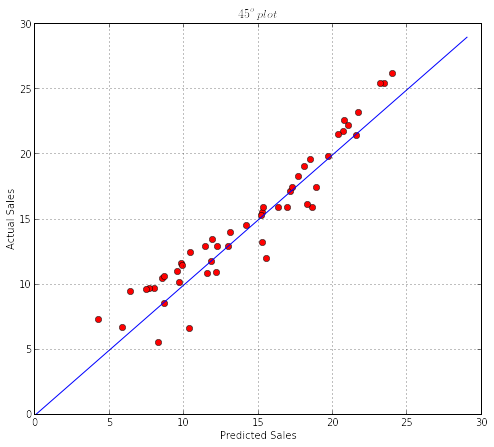

In [170]:
fig1=plt.figure(figsize=(8,7))
axes1=fig1.add_subplot(111)
a=np.arange(30)
axes1.plot(y_pred,y_test, color='red',linestyle='',marker='o')
axes1.plot(a,a, color='b',linestyle='-')
axes1.set_xlabel('Predicted Sales')
axes1.set_ylabel('Actual Sales')
axes1.set_title("$45^o plot$")
axes1.grid()
plt.show()

In [171]:
import pandas as pd

In [172]:
w=np.ravel(y_test)
w

array([  6.7,  19. ,  12.4,  13.2,  17.1,   7.3,  15.5,  25.4,  18.3,
        22.6,  12. ,  15.9,  15.9,  15.9,   9.7,  10.9,  10.8,   9.7,
        10.4,  21.4,  19.8,  21.7,  14. ,  11.7,  17.4,  23.2,  13.4,
        12.9,  22.2,  10.6,   8.5,  12.9,   5.5,  11. ,   9.4,  15.3,
        25.4,  14.5,  26.2,  15.9,  12.9,  19.6,  16.1,  21.5,  11.6,
         9.6,  17.4,  10.1,  11.4,   6.6])

In [173]:
y_pred

array([  5.87588609,  18.13980166,  10.48327503,  15.26735019,
        17.20221251,   4.28462519,  15.26927555,  23.46218562,
        17.69313254,  20.79130933,  15.56224788,  16.377019  ,
        18.66554563,  17.00449384,   8.05707764,  12.17277234,
        11.60823456,   7.68095463,   8.59756595,  21.58331026,
        19.71424569,  20.73524907,  13.14648782,  11.89465766,
        17.28345959,  21.72671757,  11.96353361,  12.26673728,
        21.09460852,   8.70165984,   8.68784273,  11.46965408,
         8.32670947,   9.54581807,   6.42944303,  15.23295679,
        23.21425739,  14.21559265,  24.03182467,  15.34872304,
        13.0108054 ,  18.4896504 ,  18.30209586,  20.40523253,
         9.81972023,   7.47183939,  18.89291407,   9.69491105,
         9.92307421,  10.37094765])

In [174]:
x=np.arange(1,51)
pf=pd.DataFrame(x,columns=['x'])
pf['y_predicted']=y_pred
pf['y_actual']=w

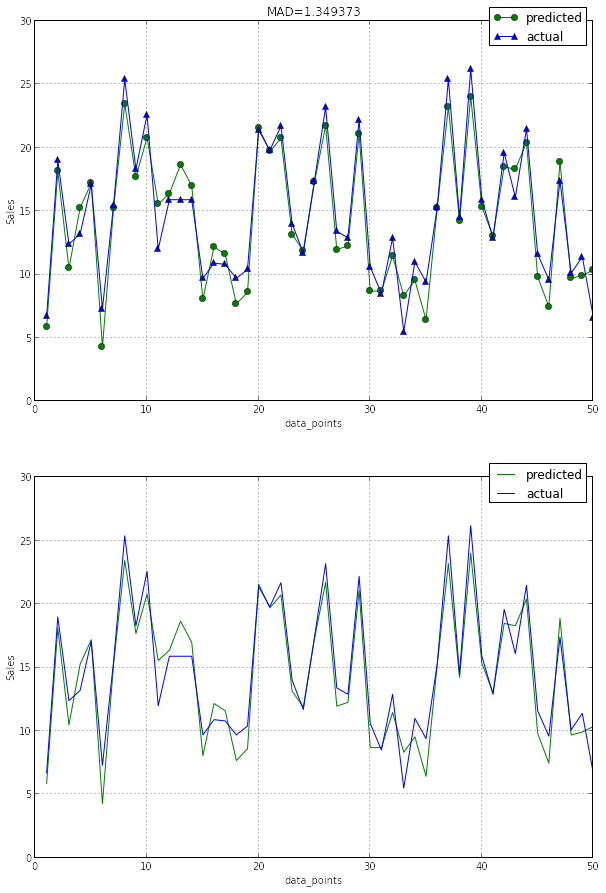

In [182]:
fig2=plt.figure(figsize=(10,15))
axes=fig2.add_subplot(211)
axes.plot(pf['x'],pf['y_predicted'],'go',linestyle='-',label='predicted')
axes.plot(pf['x'],pf['y_actual'],'b^',linestyle='-',label='actual')
axes.set_xlabel('data_points')
axes.set_ylabel('Sales')
axes.set_title("MAD=%f" %(MAD))
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()

axes=fig2.add_subplot(212)
axes.plot(pf['x'],pf['y_predicted'],'g',linestyle='-',label='predicted')
axes.plot(pf['x'],pf['y_actual'],'b',linestyle='-',label='actual')
axes.set_xlabel('data_points')
axes.set_ylabel('Sales')
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()
plt.show()
